#### Name Surname:
#### StudentID:

#### Important Notes: 
Change this file name to **studentId_LabWork2.ipynb**. After finished your work, upload your file to the related field in LMS

### LabWork2 - Exploratory Data Analysis (EDA)

Following steps should be applied on your lab work datasets.

1. Read data using pandas
2. Describe your data basically.
3. Perform structure investigation for numerical \& non-numarical features:
   - Number of samples and features,
   - What kind of data type each feature has,
   - How many of them are binary, ordinal, categorical or continuous.
4. Perform quality investigation:
   - Find duplicated rows and drop them
   - Find the Null & Missing values
       - Replace the Null & Missing values using two different *"data imputation"* methods
   - Find outliers
   -  Replace outliers using two different method
5. Export your data as ...
-------------------
   

In [138]:
# 1. Read data using pandas

In [139]:
import numpy as np
import pandas as pd
fileDir = "../Lab/bank.csv"
df = pd.read_csv(fileDir)

In [140]:
# 2. Describe your data basically.

Pazarlama kampanyaları, müşteri ihtiyaçlarına ve genel memnuniyetlerine odaklanarak karakterize edilir. Bununla birlikte, bir pazarlama kampanyasının başarılı olup olmayacağını belirleyen farklı değişkenler vardır. Bir pazarlama kampanyası yapılırken dikkate alınması gereken belirli değişkenler vardır.

Banka Müşteri Verileri:
- **Yaş**: (Sayısal)
- **İş**: İş türü (Kategorik: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **Medeni Durum**: Medeni durum (Kategorik: 'divorced','married','single','unknown'; not: 'divorced' boşanmış veya dul anlamına gelir)
- **Eğitim**: (Kategorik: primary, secondary, tertiary ve unknown)
- **Varsayılan**: Varsayılan kredisi var mı? (Kategorik: 'no','yes','unknown')
- **Konut**: Konut kredisi var mı? (Kategorik: 'no','yes','unknown')
- **Kredi**: Kişisel kredi var mı? (Kategorik: 'no','yes','unknown')
- **Bakiye**: Bireyin bakiyesi.

Mevcut Kampanyanın Son İletişimiyle İlgili:
- **İletişim**: İletişim türü (Kategorik: 'cellular','telephone')
- **Ay**: Yılın son iletişim ayı (Kategorik: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **Gün**: Haftanın son iletişim günü (Kategorik: 'mon','tue','wed','thu','fri')
- **Süre**: Son iletişim süresi, saniye cinsinden (Sayısal). Önemli not: Bu özellik, çıktı hedefini büyük ölçüde etkiler (örneğin, süre=0 ise y='hayır'). Ancak, süre bir arama gerçekleştirilmeden önce bilinmez. Ayrıca, aramanın sonunda y açıkça bilinir. Bu nedenle, bu girdi sadece referans amaçlı dahil edilmeli ve gerçekçi bir tahmin modeli amacı varsa dışarıda bırakılmalıdır.

Diğer Özellikler:
- **Kampanya**: Bu kampanya süresince ve bu müşteri için gerçekleştirilen iletişim sayısı (Sayısal, son iletişimi içerir)
- **Pdays**: Müşteri en son bir önceki kampanyadan ne kadar süre önce iletişim kurulduğunda geçen gün sayısı (Sayısal; 999 müşteri önceden iletişim kurulmadığı anlamına gelir)
- **Önceki**: Bu kampanya öncesinde ve bu müşteri için gerçekleştirilen iletişim sayısı (Sayısal)
- **Poutcome**: Önceki pazarlama kampanyasının sonucu (Kategorik: 'failure','nonexistent','success')

Çıktı Değişkeni (Aranan Hedef):
- **y**: Müşteri vadeli mevduat aboneliği yaptı mı? (İkili: 'yes','no')

In [141]:
type(df)

pandas.core.frame.DataFrame

In [142]:
df.shape

(11162, 17)

In [143]:
len(df)

11162

In [144]:
len(df.index)

11162

In [145]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [146]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [147]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [148]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [150]:
# 3. Perform structure investigation for numerical \& non-numarical features:

In [151]:
pd.value_counts(df.dtypes)

/var/folders/82/88jc4fgd6ys16dqxbtt4znwh0000gn/T/ipykernel_94349/3340016861.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.dtypes)


object    10
int64      7
Name: count, dtype: int64

In [152]:
#non-numbers
df.select_dtypes(exclude='number').head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


In [153]:
#numbers
df.select_dtypes(include='number').head(3)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


In [154]:
df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [155]:
df.education.nunique()

4

In [156]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [157]:
uniqueVals = df.select_dtypes(include='number').nunique().sort_values()
print(uniqueVals)

day           31
previous      34
campaign      36
age           76
pdays        472
duration    1428
balance     3805
dtype: int64


In [158]:
df.describe(exclude="number").T.head(6)

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702


In [159]:
np.sum(df.isnull())

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [160]:
np.sum(df.marital == "married")

6351

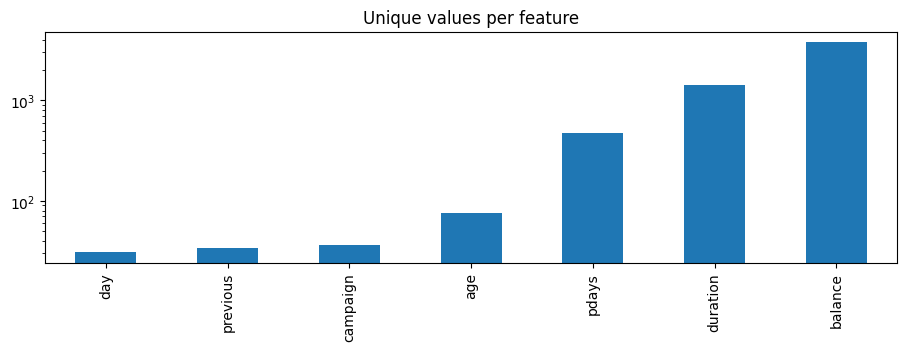

In [161]:
uniqueVals.plot.bar(logy=True, figsize=(11, 3), title="Unique values per feature");

In [162]:
# 4. Perform quality investigation:

In [163]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

In [164]:
nDuplicates = df.duplicated().sum()
print(f"You seem to have {nDuplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


In [165]:
df.isna().sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
190,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9741,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9217,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5668,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [166]:
df.isnull().sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2074,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7411,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [167]:
df.notna().sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9080,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
10992,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
254,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1007,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1377,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


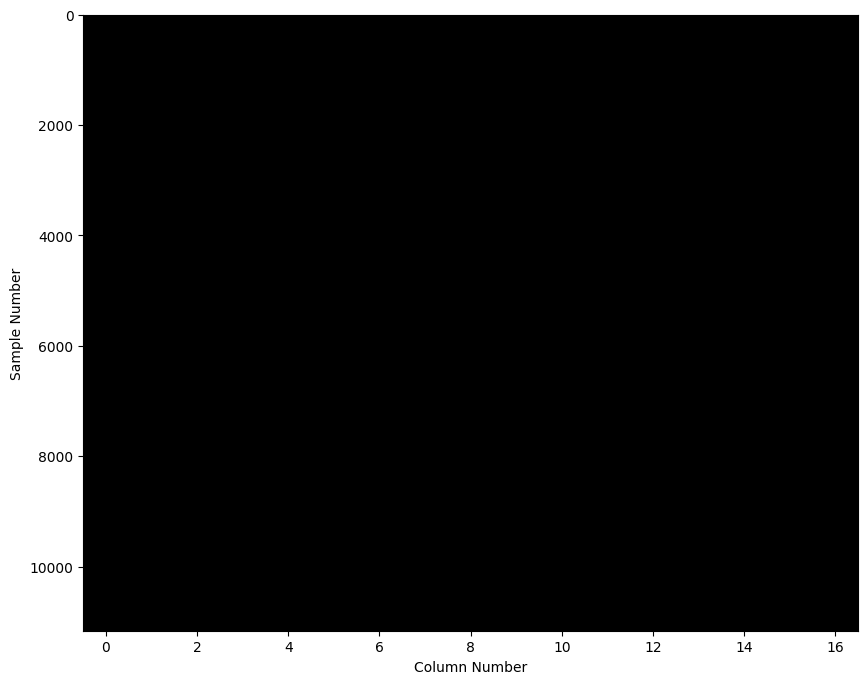

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [169]:
np.random.seed(1000)  # Sonuçların tekrarlanabilir olması için belirli bir seed belirledim
#remove_n = int(len(df) * 0.20)  # Silinecek satır sayısı (%20)
#drop_indices = np.random.choice(df.index, remove_n, replace=False)  # Rastgele seçilen iindisler
#df_subset = df.age.drop(drop_indices)  # Seçilen satırları sil

# Veride hiç null değer olmadığı için bir kısmını kısmı siliyorum.
features_to_drop = ['age','job','marital','education','balance','contact','campaign','pdays','previous','poutcome']

for feature in features_to_drop:
    # Belirli bir özelliğin belirli bir yüzdesini rastgele olarak seçelim
    num_rows = df.shape[0]
    num_rows_to_drop = int(np.random.uniform(0.05,0.30) * num_rows)  # %5 ile %30 arasında değerler seçelim
    rows_to_drop = np.random.choice(df.index, num_rows_to_drop, replace=False)

    # Seçilen satırların belirli bir özellik değerlerini NaN olarak ayarlayalım
    df.loc[rows_to_drop, feature] = np.nan

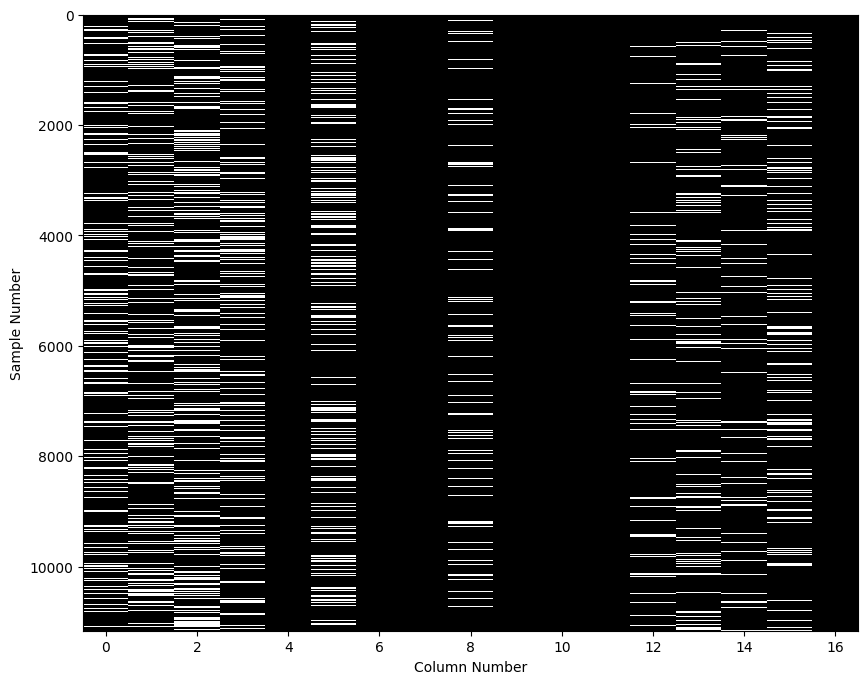

In [170]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [171]:
df.dropna(axis=0, how='all').shape

(11162, 17)

In [172]:
df.isna().sum()

age          2381
job          2390
marital      3210
education    1972
default         0
balance      2821
housing         0
loan            0
contact      1250
day             0
month           0
duration        0
campaign     1166
pdays        1274
previous      904
poutcome     1566
deposit         0
dtype: int64

In [173]:
df.isna().sum().sort_values(ascending=False)

marital      3210
balance      2821
job          2390
age          2381
education    1972
poutcome     1566
pdays        1274
contact      1250
campaign     1166
previous      904
loan            0
day             0
month           0
duration        0
housing         0
default         0
deposit         0
dtype: int64

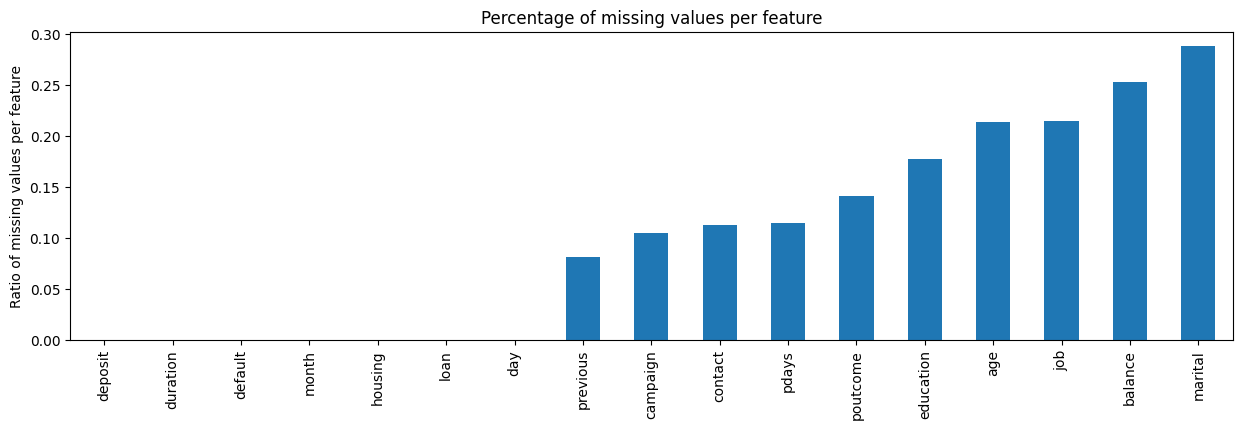

In [174]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [175]:
missingPercentages = df.isna().sum().sort_values(
    ascending = False)/len(df)*100

# Filter: sort out the ones with zeroes
missingPercentages[missingPercentages != 0]

marital      28.758287
balance      25.273249
job          21.411933
age          21.331303
education    17.667085
poutcome     14.029744
pdays        11.413725
contact      11.198710
campaign     10.446157
previous      8.098907
dtype: float64

<Axes: >

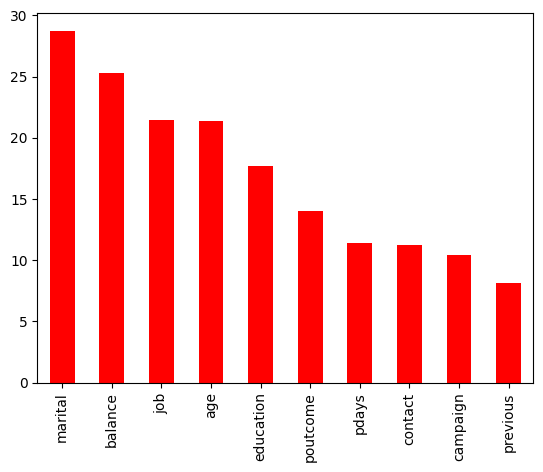

In [176]:
missingPercentages[missingPercentages != 0].plot(kind='bar', color='red')

In [177]:
print(df.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(df.count(numeric_only=True)))

age          8781
balance      8341
day         11162
duration    11162
campaign     9996
pdays        9888
previous    10258
dtype: int64
Total No. of Numerical Columns: 7


In [178]:
numericNum = df.select_dtypes(include = np.number)
numericNum

,age,balance,day,duration,campaign,pdays,previous
0,NaN,2343.0,5,1042,1.0,NaN,0.0
1,NaN,45.0,5,1467,1.0,-1.0,0.0
2,41.0,1270.0,5,1389,1.0,-1.0,0.0
3,NaN,2476.0,5,579,1.0,-1.0,NaN
4,54.0,184.0,5,673,2.0,-1.0,0.0
...,...,...,...,...,...,...,...
11157,NaN,NaN,20,257,1.0,-1.0,0.0
11158,39.0,NaN,16,83,4.0,-1.0,0.0
11159,32.0,29.0,19,156,NaN,-1.0,0.0
11160,43.0,0.0,8,9,2.0,172.0,5.0


In [179]:
missPercent = df.isna().sum().sort_values(
    ascending = False)/len(df)
missPercent[missPercent != 0]

marital      0.287583
balance      0.252732
job          0.214119
age          0.213313
education    0.176671
poutcome     0.140297
pdays        0.114137
contact      0.111987
campaign     0.104462
previous     0.080989
dtype: float64

In [180]:
numericNum = df.select_dtypes(include = np.number)
numericColumns = numericNum.columns
numericColumns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [181]:
df[numericColumns] = df[numericColumns].fillna(df[numericColumns].mean())

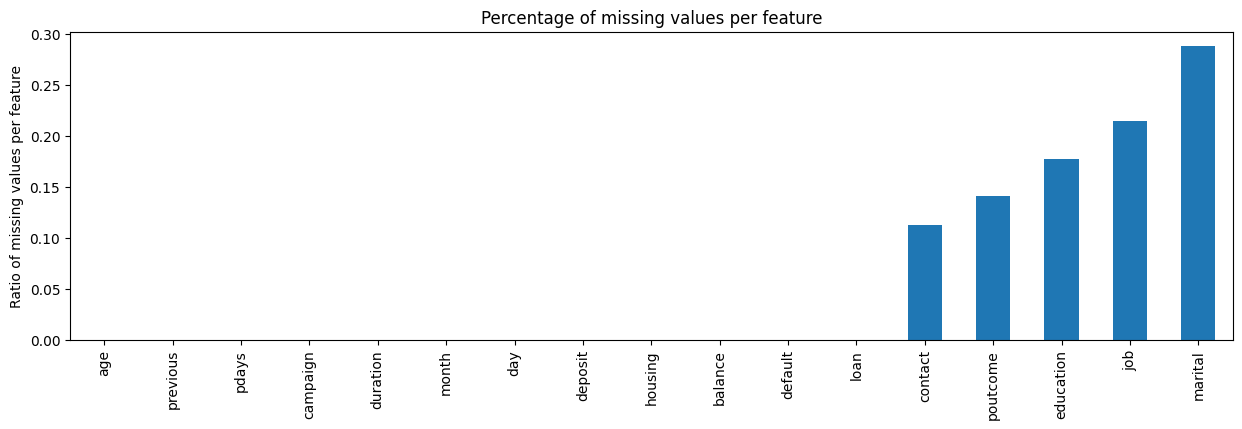

In [182]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [183]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      3300
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       37
pdays         453
previous       35
poutcome        4
deposit         2
dtype: int64

In [184]:
df.select_dtypes('object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

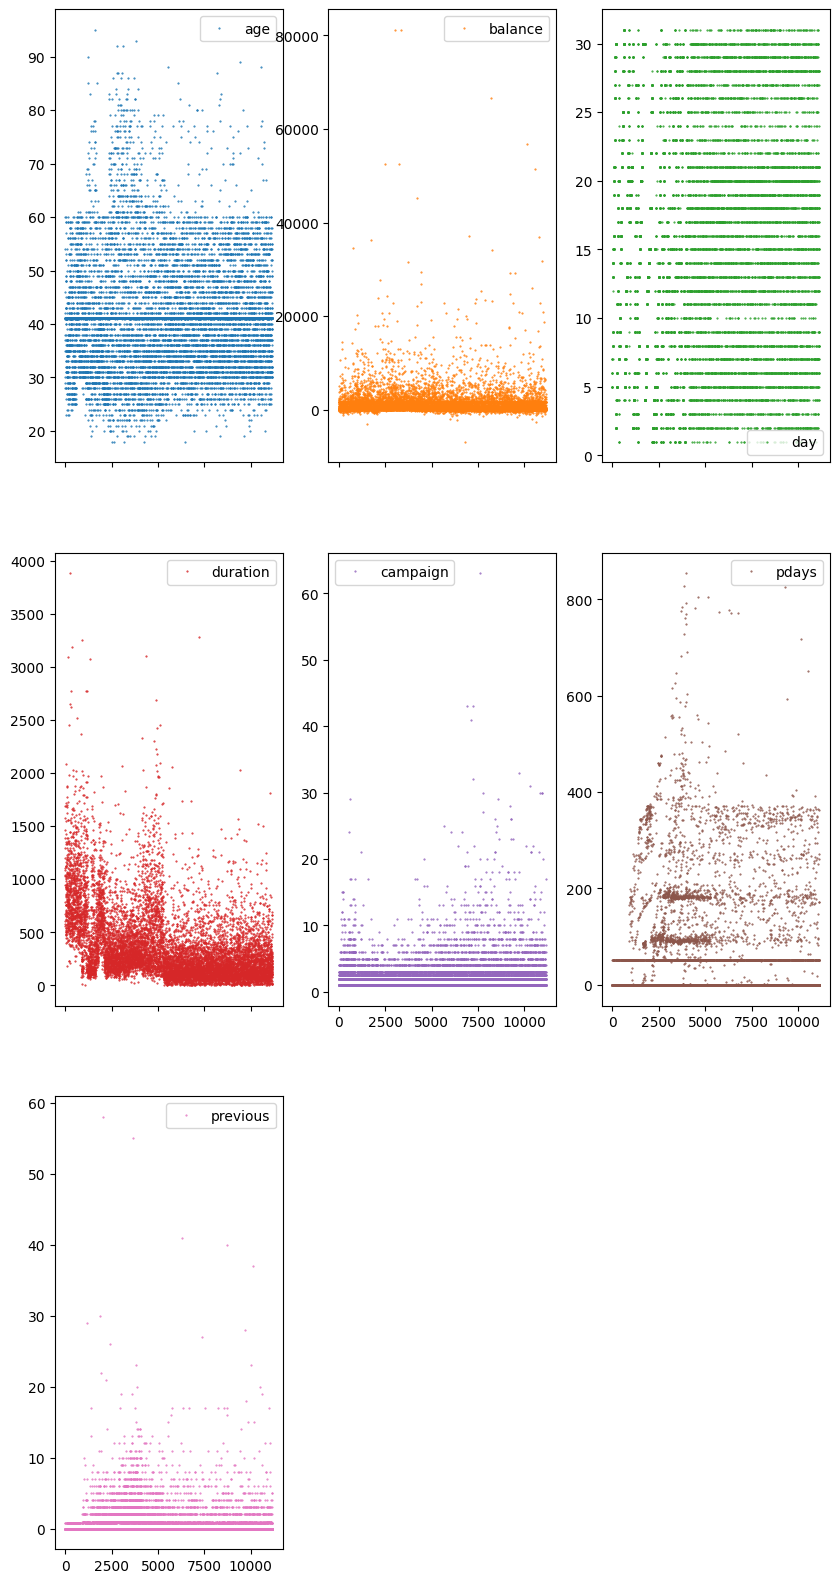

In [185]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(10, 20), markersize=1);

<Axes: ylabel='count'>

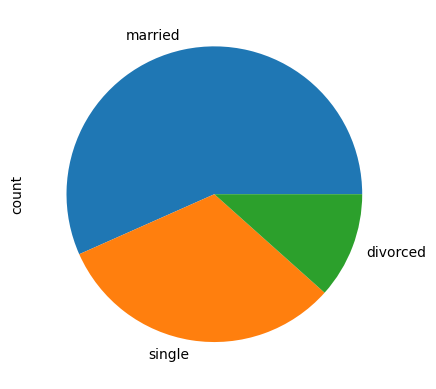

In [186]:
df['marital'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

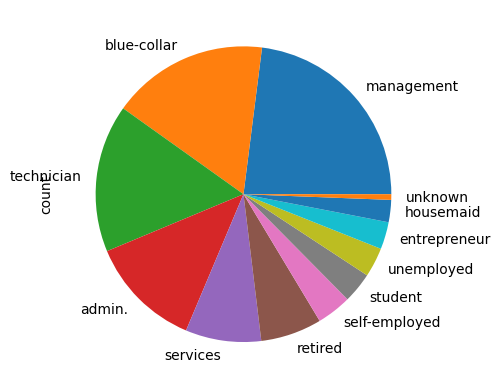

In [187]:
df['job'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

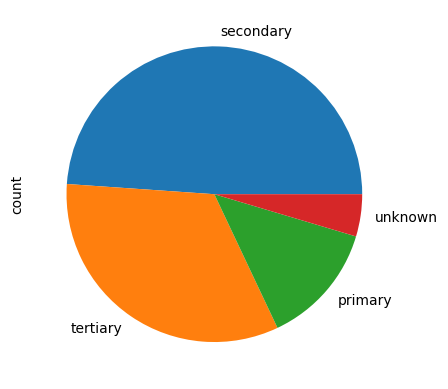

In [188]:
df['education'].value_counts().plot(kind='pie')

In [189]:
# 5. Export your data as ...

In [190]:
df.to_csv("output_bank_DataFrame.csv", index=False)